In [12]:
import matplotlib
import skimage
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
import cv2

In [14]:
def imshow_bgr(im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

# %%bash
# git init
# git config --global user.name i008
# git config --global user.email kubacieslik@gmail.com

In [4]:
# !git add . 
# !git commit -a -m "init"
# !git remote add origin ssh://github.com/i008/pyimagegurus.git
# !git push origin master 

## 1.1

In [3]:
%%writefile load_display_save.py

import argparse
import cv2
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help='Path to the image')
args = vars(ap.parse_args())
image = cv2.imread(args['image'])
print "width: %d pixels" %(image.shape[1])
print "height: %d pixels" %(image.shape[0])
print "channels: %d" %(image.shape[2])

cv2.imshow("Image", image)
cv2.waitKey(0)

# cv2.imwrite('data/new.jpg', image)




Overwriting load_display_save.py


In [4]:
%%bash

python load_display_save.py -i "data/florida_trip.png"

width: 600 pixels
height: 450 pixels
channels: 3


In [ ]:
%%bash

python load_display_save.py -i "data/grand_canyon.png"

### QUIZ 1.1

In [ ]:
gir = cv2.imread('data/giraffe.png')
gir.shape

## ------

## 1.2

Black:  (0, 0, 0)  
White:  (255, 255, 255)  
Red:  (255, 0, 0)  
Green:  (0, 255, 0)  
Blue:  (0, 0, 255)  
Aqua:  (0, 255, 255)  
Fuchsia:  (255, 0, 255)  
Maroon:  (128, 0, 0)  
Navy:  (0, 0, 128)  
Olive:  (128, 128, 0)  
Purple:  (128, 0, 128)  
Teal:  (0, 128, 128)  
Yellow:  (255, 255, 0)  

In [ ]:
%%HTML
<img src='https://gurus.pyimagesearch.com/wp-content/uploads/2015/03/image_grid.png'>

In [ ]:
%%writefile getting_and_setting.py
import argparse
import cv2

ap = argparse.ArgumentParser()
ap.add_argument('-i','--image',required=True, help='Path to image')
ap.add_argument('-d','--display', required=False)
args = vars(ap.parse_args())

image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
if args['display']:
    cv2.imshow("Original", image)
    cv2.waitKey(0)

(b, g, r) = image[0, 0]
print "Pixel at (0,0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b)

#setting pixel value to RED
image[0,0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print "Pixel at (0,0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b)


#center of the image
(cX, cY) = (w/2, h/2)
tl = image[0:cY, 0:cX]
tr = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
tl_green = image[0:cY, 0:cX] = (0, 255, 0)


# cv2.imshow("",tr)
# cv2.waitKey()
# cv2.imshow("",bl)
# cv2.waitKey()
# cv2.imshow("",tl_green)
# cv2.waitKey()
# cv2.imshow("top left", tl)
# cv2.waitKey()


In [19]:
%%bash
python getting_and_setting.py -i 'data/florida_trip.png' 


Pixel at (0,0) - Red: 233, Green: 240, Blue: 246
Pixel at (0,0) - Red: 255, Green: 0, Blue: 0


## /\/\/\/\/\/\

## 1.3) DRAWING 



In [5]:
canvas = np.zeros((300, 300, 3), dtype="uint8")
# rows / columns / channels
# uint8 = 8bits depth

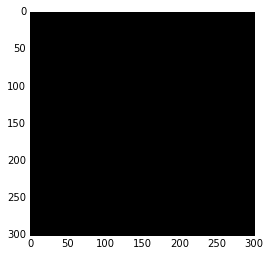

In [6]:
plt.imshow(canvas)

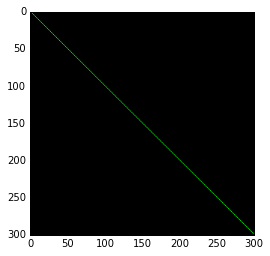

In [7]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt.imshow(canvas)

In [8]:
red = (0, 255, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)

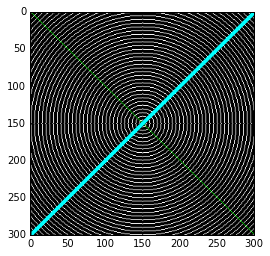

In [12]:
plt.imshow(canvas)

In [13]:
cv2.rectangle(canvas, (10, 10), (60, 60), green)
blue = (255, 0, 0)
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

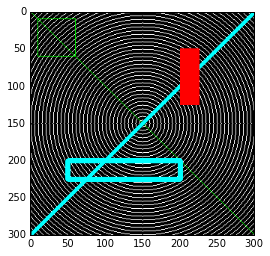

In [14]:
plt.imshow(canvas)

#### CIRCLES

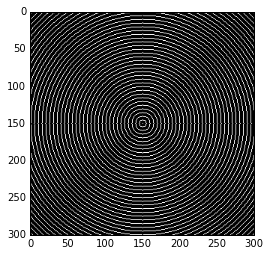

In [4]:
cangen = lambda: np.zeros((300, 300, 3), dtype='uint8')
canvas = cangen()

# center of canvas
(centerX, centerY) = (canvas.shape[1] / 2, canvas.shape[0] / 2)

white = (255, 255, 255)
for r in xrange(0, 300, 5):
    cv2.circle(canvas, (centerX, centerY), r, white)

plt.imshow(canvas)





In [5]:
383*972

372276

In [7]:
im = cv2.imread('data/florida_trip.png')

In [8]:
im[111,225]

array([241, 239, 231], dtype=uint8)

In [16]:
cv2.rectangle(canvas, (400, 50), (225, 125), blue, -1)

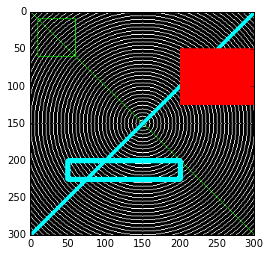

In [18]:
plt.imshow(canvas)

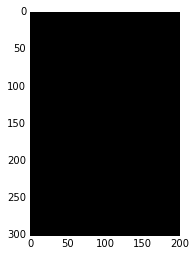

In [22]:
plt.imshow(np.zeros((300,200,3)))

## 1.4.1 Translation

In [2]:
def imshow_bgr(im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


In [29]:
%%writefile translation.py

# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
args = vars(ap.parse_args())
 
# load the image and show it
image = cv2.imread(args["image"])
cv2.imshow("Original", image)
 
# NOTE: Translating (shifting) an image is given by a NumPy matrix in
# the form:
#	[[1, 0, shiftX], [0, 1, shiftY]]
# You simply need to specify how many pixels you want to shift the image
# in the X and Y direction -- let's translate the image 25 pixels to the
# right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Down and Right", shifted)
 
# now, let's shift the image 50 pixels to the left and 90 pixels up, we
# accomplish this using negative values
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Up and Left", shifted)
cv2.waitKey(0)

Overwriting translation.py


In [31]:
%%bash
python translation.py -i data/florida_trip.png

In [68]:
image = cv2.imread('data/florida_trip.png')
M = np.float32([[1,0,-15], [0,1,-20]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

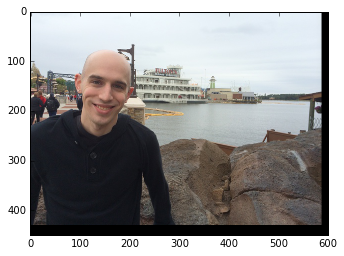

In [69]:
imshow_bgr(shifted)

In [50]:
cv2.warpAffine?

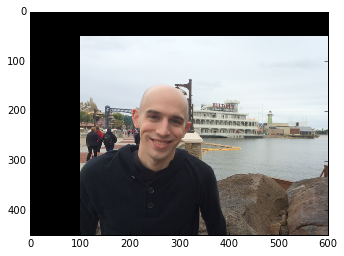

In [61]:
imshow_bgr(imutils.translate(image, 100, 50))

## 1.4.2: Rotation

Rotation  
Similar to translation, and perhaps unsurprisingly,   rotation by an angle, \theta can be defined by   constructing a matrix M in the form:  

M = \begin{bmatrix}cos \theta & -sin \theta \\sin \theta & cos\theta\end{bmatrix}  
Given an (x, y)-Cartesian plane, this matrix can be   used to rotate a vector \theta degrees (counter-clockwise) about the origin. In this case, the origin   is normally the center of the image; however, in practice we can define any arbitrary (x, y)   coordinate as our rotation center.  

From the original image I, the rotated image R is   then obtained by simple matrix multiplication: R = IM  

However, OpenCV also provides the ability to (1)   scale (i.e. resize) an image and (2) provide an   arbitrary rotation center to perform the rotation   about.  

Our modified rotation matrix M is thus:  

M = \begin{bmatrix}\alpha & \beta & (1 - \alpha)   \times c_{x} - \beta \times c_{y} \\-\beta & \alpha & \beta \times c_{x} + (1 - \alpha) \times   c_{y}\end{bmatrix}  
Where:  

\alpha = scale * cos \theta and \beta = scale * sin \theta and c_{x} and c_{y} are the respective (x, y)-coordinates that the rotation is performed about.
If the mathematics is starting to get a bit overwhelming, no worries — we’re about to jump into some code that will make these concepts a lot more clear.

Open up a new file, name it rotate.py , and let’s get started:

In [86]:
%%writefile rotate.py

import numpy as np
import argparse
import imutils
import cv2

ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to image")
args = vars(ap.parse_args())

image = cv2.imread(args["image"])
cv2.imshow("Original", image)
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("Rotated 45 degrees", rotated)

cv2.waitKey(0)

Overwriting rotate.py


In [91]:
%%bash
python rotate.py -i data/florida_trip.png

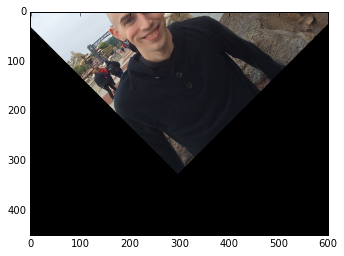

In [95]:
imshow_bgr(imutils.rotate(image, 45, center=(0,30)))

In [104]:
#imshow_bgr(image)
cv2.rectangle(image, (100,100), (125, 125), (0,0,0))

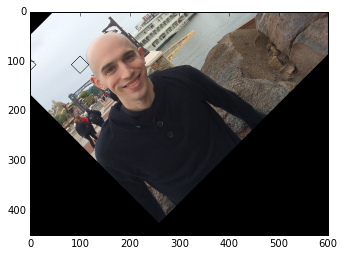

In [108]:
imshow_bgr(imutils.rotate(image, 45, center=(100,125)))

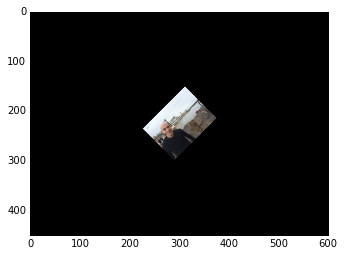

In [112]:
imshow_bgr(imutils.rotate(image, 45, scale=0.2))

In [133]:
wynn = cv2.imread('data/wynn.png')

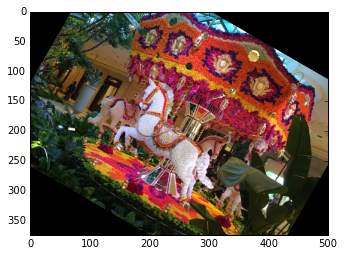

In [121]:
imshow_bgr(imutils.rotate(wynn, -30))
rot = imutils.rotate(wynn, -30)

In [120]:
rot[335, 254]

array([ 50, 167, 219], dtype=uint8)

In [136]:
cv2.circle(wynn,(335, 254), 10, (0,255,255), -1)

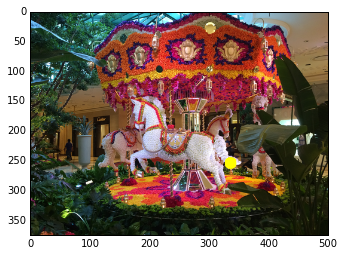

In [137]:
imshow_bgr(wynn)

# 1.4.3 Resizing


In [64]:
#q1

image = cv2.imread('data/florida_trip_small.png')

In [65]:
#image = cv2.imread(args["image"])
#cv2.imshow("Original", image)
 
# we need to keep in mind aspect ratio so the image does not look skewed
# or distorted -- therefore, we calculate the ratio of the new image to
# the old image. Let's make our new image have a width of 150 pixels
r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))
dim2 = (image.shape[1] * 2, image.shape[0] * 2) 
# perform the actual resizing of the image
resized = cv2.resize(image, dim2, interpolation=cv2.INTER_CUBIC)
cv2.imshow("Resized (Width)", resized)

In [66]:
resized[367, 170]

array([25, 20, 20], dtype=uint8)

In [34]:
resized[74, 20]

array([26, 19, 16], dtype=uint8)

In [59]:
image.shape
resized.shape

(500, 376, 3)

In [61]:
image.shape

(188, 250, 3)

In [67]:
!pip install imutils

  Running setup.py bdist_wheel for imutils
  Stored in directory: /home/i008/.cache/pip/wheels/1e/93/d6/e8c01edbef294947e6b296d81c9349e294c3ae372a87e99651
Successfully built imutils


In [68]:
import imutils

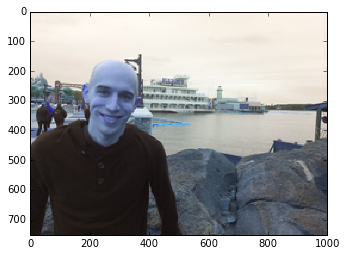

In [72]:
plt.imshow(imutils.resize(image, width=1000))

# 1.4.4 Flipping


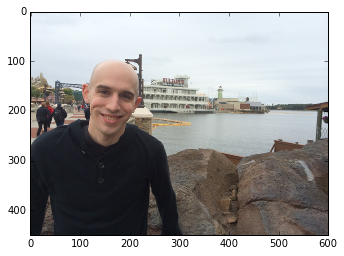

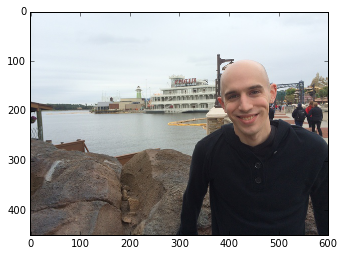

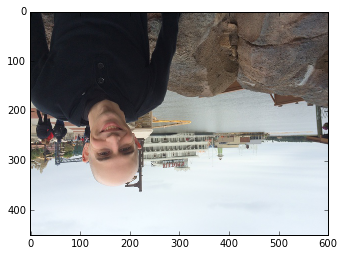

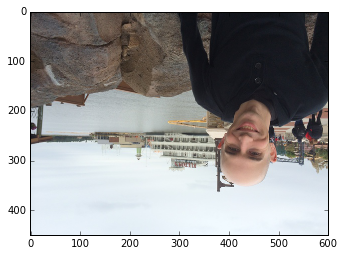

In [7]:
image = cv2.imread('data/florida_trip.png')



imshow_bgr(image)
 
# flip the image horizontally
plt.figure()
flipped = cv2.flip(image, 1)
imshow_bgr(flipped)

plt.figure()
# flip the image vertically
flipped = cv2.flip(image, 0)
imshow_bgr(flipped)
plt.figure() 
# flip the image along both axes
flipped = cv2.flip(image, -1)
imshow_bgr(flipped)


In [28]:
# Q1
image = cv2.imread('data/florida_trip.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hor = cv2.flip(image, 1)


hor[235, 259]

array([183, 192, 189], dtype=uint8)

In [24]:

#Q2
image = cv2.imread('data/florida_trip.png')
hor = cv2.flip(image, 0)
horrot = imutils.rotate(hor, 45)
horrotvert = cv2.flip(horrot, 1)

horrotvert[189, 441]



array([25, 20, 17], dtype=uint8)

# 1.4.5 Cropping

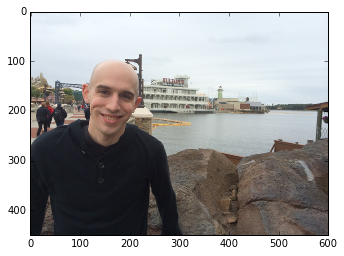

In [15]:
image = cv2.imread("data/florida_trip.png")
imshow_bgr(image)

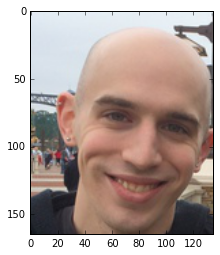

In [21]:
face = image[85:250, 85:220]
imshow_bgr(face)

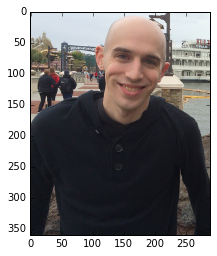

In [23]:
body = image[90:450, 0:290]
imshow_bgr(body)

In [24]:
rocks = image[300:, 400:]

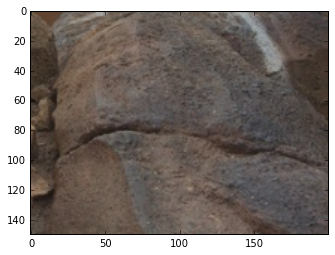

In [25]:
imshow_bgr(rocks)

In [77]:
people = image[175:235,13:81]

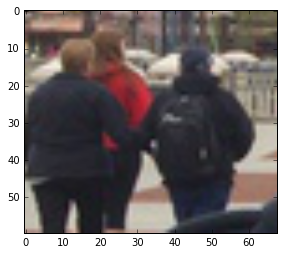

In [78]:
imshow_bgr(people)

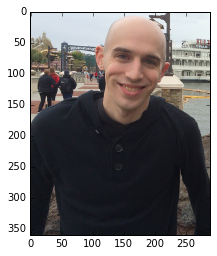

In [86]:
imshow_bgr(image[90:450, 0:290])


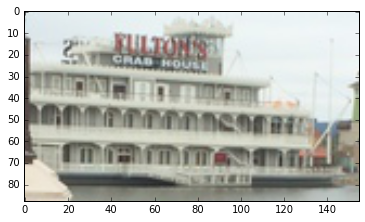

In [90]:
imshow_bgr(image[124:212, 225:380])


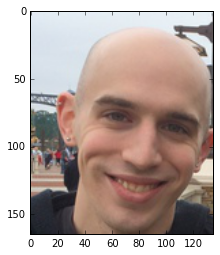

In [88]:
imshow_bgr(image[85:250, 85:220])


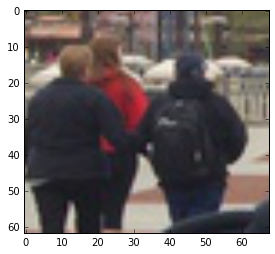

In [89]:
imshow_bgr(image[173:235, 13:81])

# 1.4.6 Image Arithmetic


In [113]:
i = image[100:200, 300:400]
ii = image[200:300, 400:500]

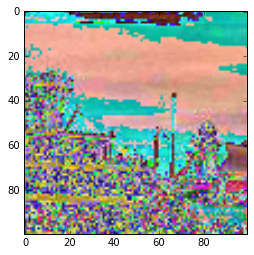

In [114]:
imshow_bgr(ii-np.sqrt(i))
